In [13]:
#https://github.com/Alxsoa/Eleicoes2020.git
#######################################################################
# Inclusao de Modulos Necessarios 
#######################################################################
#
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

#
#######################################################################
# Definindo Ambiente Google
#######################################################################
#
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

#
#######################################################################
# Definindo Customizações
#######################################################################
#
pd.options.display.max_rows = 500

In [14]:
#
#######################################################################
# Definindo o Diretorio dos datasets
#######################################################################
#

PATH    = "/home/asoares/MEGA/Work/ASC/Ciencia de Dados/INTRODUÇÃO A MODELAGEM DE INCERTEZAS/Curso/Modulo 1/Curso de Python/Dados Eleição/Votacao/Pesquisa/"
CSVFile = "bweb_1t_RS_181120201549.csv"
CSVREGIAO = "RegiaoMunicipio.csv"
CSVDATA   = PATH + CSVFile
CSVREGIAO = PATH + CSVREGIAO

#
#######################################################################
# Leitura dos datasets
#######################################################################
#
DadosBrutosEleicao = pd.read_csv (
                                    CSVDATA, 
                                    sep = ';', 
                                    encoding = 'iso-8859-1',
                                    usecols = [ 
                                                'QT_VOTOS',
                                                'NM_VOTAVEL',
                                                'SG_PARTIDO', 
                                                'NM_MUNICIPIO', 
                                                'DS_CARGO_PERGUNTA'
                                              ]
                                 )
#
# https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Rio_Grande_do_Sul_por_popula%C3%A7%C3%A3o
# 
MunicipioRegiao = pd.read_csv (
                                CSVREGIAO, 
                                sep = ';'
                              )

In [15]:
#
#######################################################################
# Separando Dados de Interesse dos Demais Dados
#######################################################################
#
DadosBrutosEleicao = DadosBrutosEleicao[DadosBrutosEleicao['DS_CARGO_PERGUNTA'] == "Prefeito"]
DadosBrutosEleicao = DadosBrutosEleicao[DadosBrutosEleicao['NM_VOTAVEL'] != "Branco"]
DadosBrutosEleicao = DadosBrutosEleicao[DadosBrutosEleicao['NM_VOTAVEL'] != "Nulo"]
DadosBrutosEleicao.head(5)


,NM_MUNICIPIO,DS_CARGO_PERGUNTA,SG_PARTIDO,NM_VOTAVEL,QT_VOTOS
0,PORTO ALEGRE,Prefeito,PSDB,NELSON MARCHEZAN JÚNIOR,41
1,PORTO ALEGRE,Prefeito,PDT,JULIANA BRIZOLA,12
2,PORTO ALEGRE,Prefeito,MDB,SEBASTIÃO MELO,68
3,PORTO ALEGRE,Prefeito,PSD,VALTER,5
4,PORTO ALEGRE,Prefeito,PV,MONTSERRAT MARTINS,1


In [4]:
#
#######################################################################
# Adicionando a Regiao aos Dados Principais
#######################################################################
#
DadosBrutosEleicao = pd.merge(DadosBrutosEleicao, MunicipioRegiao, left_on = 'NM_MUNICIPIO', right_on='MUNICIPIO', how='outer') 
DadosBrutosEleicao.head(5)

,NM_MUNICIPIO,DS_CARGO_PERGUNTA,SG_PARTIDO,NM_VOTAVEL,QT_VOTOS,MUNICIPIO,REGIAO
0,PORTO ALEGRE,Prefeito,PSDB,NELSON MARCHEZAN JÚNIOR,41.0,PORTO ALEGRE,METROPOLITANA
1,PORTO ALEGRE,Prefeito,PDT,JULIANA BRIZOLA,12.0,PORTO ALEGRE,METROPOLITANA
2,PORTO ALEGRE,Prefeito,MDB,SEBASTIÃO MELO,68.0,PORTO ALEGRE,METROPOLITANA
3,PORTO ALEGRE,Prefeito,PSD,VALTER,5.0,PORTO ALEGRE,METROPOLITANA
4,PORTO ALEGRE,Prefeito,PV,MONTSERRAT MARTINS,1.0,PORTO ALEGRE,METROPOLITANA


In [5]:
#
#######################################################################
# Lista de Partidos nos Brasil
# https://www.todapolitica.com/partidos-politicos-brasil/
#######################################################################
#

PartidoSigla = [ 'MDB',  'PTB',       'PDT',    'PT', 
                 'DEM',  'PC do B',   'PSB',    'PSDB',
                 'PTC',  'PSC',       'PMN',    'REPUBLICANOS',
                 'PPS',  'PV',        'AVANTE', 'PP',
                 'PSTU', 'PCB',       'PRTB',   'PHS',
                 'DC',   'PCO',       'PODE',   'PSL',
                 'PRB',  'PSOL',      'PR',     'PSD',
                 'PPL',  'PATRIOTAS', 'PROS',   'SOLIDARIEDADE',
                 'NOVO', 'REDE',      'PMB' ,   'PP']

PartidoPosicao = [  'Centro',          'Centro',           'Centro-Esquerda', 'Centro-Esquerda',
                    'Centro-Direita',  'Extrema-Esquerda', 'Centro-Esquerda', 'Centro-Direita',
                    'Centro-Direita',  'Direita',          'Esquerda',        'Direita',
                    'Centro-Esquerda', 'Centro-Esquerda',  'Centro',          'Direita',
                    'Extrema-Esquerda','Extrema-Esquerda', 'Extrema-Direita', 'Centro-Direita',
                    'Centro-Direita',  'Extrema-Esquerda', 'Centro',          'Extrema-Direita',
                    'Centro-Direita',  'Extrema-Esquerda', 'Centro-Direita',  'Centro',
                    'Esquerda',        'Extrema-Direita',  'Centro-Esquerda', 'Centro-Esquerda',
                    'Direita',         'Centro-Esquerda',  'Centro-Esquerda', 'Direita' ]

PartidoNome = [     'Movimento Democrático Brasileiro',               'Partido Trabalhista Brasileiro',
                    'Partido Democrático Trabalhista',                'Partido dos Trabalhadores',
                    'Democratas',                                     'Partido Comunista do Brasil',
                    'Partido Socialista Brasileiro',                  'Partido da Social Democracia Brasileira',
                    'Partido Trabalhista Cristão',                    'Partido Social Cristão',
                    'Partido da Mobilização Nacional',                'Partido Republicano Progressista',
                    'Partido Popular Socialista',                     'Partido Verde',
                    'Avante',                                         'Partido Progressista',
                    'Partido Socialista dos Trabalhadores Unificado', 'Partido Comunista Brasileiro',
                    'Partido Renovador Trabalhista Brasileiro',       'Partido Humanista da Solidariedade',
                    'Democracia Cristã',                              'Partido da Causa Operária',
                    'Podemos',                                        'Partido Social Liberal',
                    'Partido Republicano Brasileiro',                 'Partido Socialismo e Liberdade',
                    'Partido da República',                           'Partido Social Democrático',
                    'Partido Pátria Livre',                           'Patriota',
                    'Partido Republicano da Ordem Nacional',          'Solidariedade',
                    'Partido Novo',                                   'Rede Sustentabilidade',
                    'Partido da Mulher Brasileira',                   'Partido Progressista' ]

#
#######################################################################
# Construcao do Dataframe de Partidos
#######################################################################
#
DadosPartido = pd.DataFrame.from_dict({'Partido': PartidoSigla, 'Posicao': PartidoPosicao, 'Nome': PartidoNome}) 
del (PartidoSigla,PartidoPosicao,PartidoNome)
DadosPartido.head(5)


,Partido,Posicao,Nome
0,MDB,Centro,Movimento Democrático Brasileiro
1,PTB,Centro,Partido Trabalhista Brasileiro
2,PDT,Centro-Esquerda,Partido Democrático Trabalhista
3,PT,Centro-Esquerda,Partido dos Trabalhadores
4,DEM,Centro-Direita,Democratas


In [6]:
#
#######################################################################
# Adicionando a Posicao Politica aos Dados Principais
#######################################################################
#
DadosBrutosEleicao = pd.merge(DadosBrutosEleicao, DadosPartido, left_on = 'SG_PARTIDO', right_on='Partido', how='outer') 
DadosBrutosEleicao.head(5)

,NM_MUNICIPIO,DS_CARGO_PERGUNTA,SG_PARTIDO,NM_VOTAVEL,QT_VOTOS,MUNICIPIO,REGIAO,Partido,Posicao,Nome
0,PORTO ALEGRE,Prefeito,PSDB,NELSON MARCHEZAN JÚNIOR,41.0,PORTO ALEGRE,METROPOLITANA,PSDB,Centro-Direita,Partido da Social Democracia Brasileira
1,PORTO ALEGRE,Prefeito,PSDB,NELSON MARCHEZAN JÚNIOR,52.0,PORTO ALEGRE,METROPOLITANA,PSDB,Centro-Direita,Partido da Social Democracia Brasileira
2,PORTO ALEGRE,Prefeito,PSDB,NELSON MARCHEZAN JÚNIOR,59.0,PORTO ALEGRE,METROPOLITANA,PSDB,Centro-Direita,Partido da Social Democracia Brasileira
3,PORTO ALEGRE,Prefeito,PSDB,NELSON MARCHEZAN JÚNIOR,63.0,PORTO ALEGRE,METROPOLITANA,PSDB,Centro-Direita,Partido da Social Democracia Brasileira
4,PORTO ALEGRE,Prefeito,PSDB,NELSON MARCHEZAN JÚNIOR,53.0,PORTO ALEGRE,METROPOLITANA,PSDB,Centro-Direita,Partido da Social Democracia Brasileira


In [7]:
PorCandidato = pd.DataFrame(DadosBrutosEleicao.groupby(["NM_MUNICIPIO","REGIAO","NM_VOTAVEL"])["QT_VOTOS"].sum())
PorCandidato.head(5)

QT_VOTOS
NM_MUNICIPIO REGIAO   NM_VOTAVEL                    
ACEGUÁ       SUDOESTE DR  ALFREDO              334.0
                      EDMUNDO PICHLER          724.0
                      FERNANDINHO TEIXEIRA     319.0
                      MARCUS PETI             1095.0
                      WILLI JANZEN             361.0

In [8]:
Classificacao = [   
                    "Extrema-esquerda",
                    "Esquerda",
                    "Centro-esquerda",
                    "Centro",
                    "Centro-direita",
                    "Direita",
                    "Extrema-direita" 
                ]
Classificacao = pd.DataFrame(Classificacao, columns=["Classificacao"])
Classificacao

,Classificacao
0,Extrema-esquerda
1,Esquerda
2,Centro-esquerda
3,Centro
4,Centro-direita
5,Direita
6,Extrema-direita


In [9]:
PorRegiao = pd.DataFrame(DadosBrutosEleicao.groupby(["REGIAO","Posicao"])["QT_VOTOS"].sum())
PorRegiao

QT_VOTOS
REGIAO           Posicao                   
CENTRO-OCIDENTAL Centro             38069.0
                 Centro-Direita     46463.0
                 Centro-Esquerda    79997.0
                 Direita           197969.0
                 Extrema-Direita      336.0
CENTRO-ORIENTAL  Centro            159350.0
                 Centro-Direita     38199.0
                 Centro-Esquerda   113408.0
                 Direita           266360.0
                 Extrema-Direita    10799.0
METROPOLITANA    Centro            774188.0
                 Centro-Direita    346950.0
                 Centro-Esquerda   441091.0
                 Direita           754724.0
                 Extrema-Direita    71357.0
                 Extrema-Esquerda  227429.0
NORDESTE         Centro            503593.0
                 Centro-Direita    174684.0
                 Centro-Esquerda   563336.0
                 Direita           903344.0
                 Extrema-Direita    43404.0
                 Extrema-Esquerda   11566.0
SUDESTE          Centro            120037.0
                 Centro-Direita    107928.0
                 Centro-Esquerda   158217.0
                 Direita           129004.0
                 Extrema-Direita    15781.0
                 Extrema-Esquerda    7421.0
SUDOESTE         Centro             73828.0
                 Centro-Direita     32081.0
                 Centro-Esquerda    77679.0
                 Direita           224273.0
                 Extrema-Direita     6067.0
                 Extrema-Esquerda     862.0

In [10]:
GraficoPorRegiao = PorRegiao.reset_index(level=[0,1])
GraficoPorRegiao


,REGIAO,Posicao,QT_VOTOS
0,CENTRO-OCIDENTAL,Centro,38069.0
1,CENTRO-OCIDENTAL,Centro-Direita,46463.0
2,CENTRO-OCIDENTAL,Centro-Esquerda,79997.0
3,CENTRO-OCIDENTAL,Direita,197969.0
4,CENTRO-OCIDENTAL,Extrema-Direita,336.0
5,CENTRO-ORIENTAL,Centro,159350.0
6,CENTRO-ORIENTAL,Centro-Direita,38199.0
7,CENTRO-ORIENTAL,Centro-Esquerda,113408.0
8,CENTRO-ORIENTAL,Direita,266360.0
9,CENTRO-ORIENTAL,Extrema-Direita,10799.0


In [11]:
PorMunicipio = pd.DataFrame(DadosBrutosEleicao.groupby(["NM_MUNICIPIO","Posicao"])["QT_VOTOS"].sum())
PorMunicipio.head(5)


QT_VOTOS
NM_MUNICIPIO Posicao                  
ACEGUÁ       Centro             1058.0
             Centro-Direita     1456.0
AGUDO        Centro             2651.0
             Centro-Esquerda     241.0
             Direita            7592.0

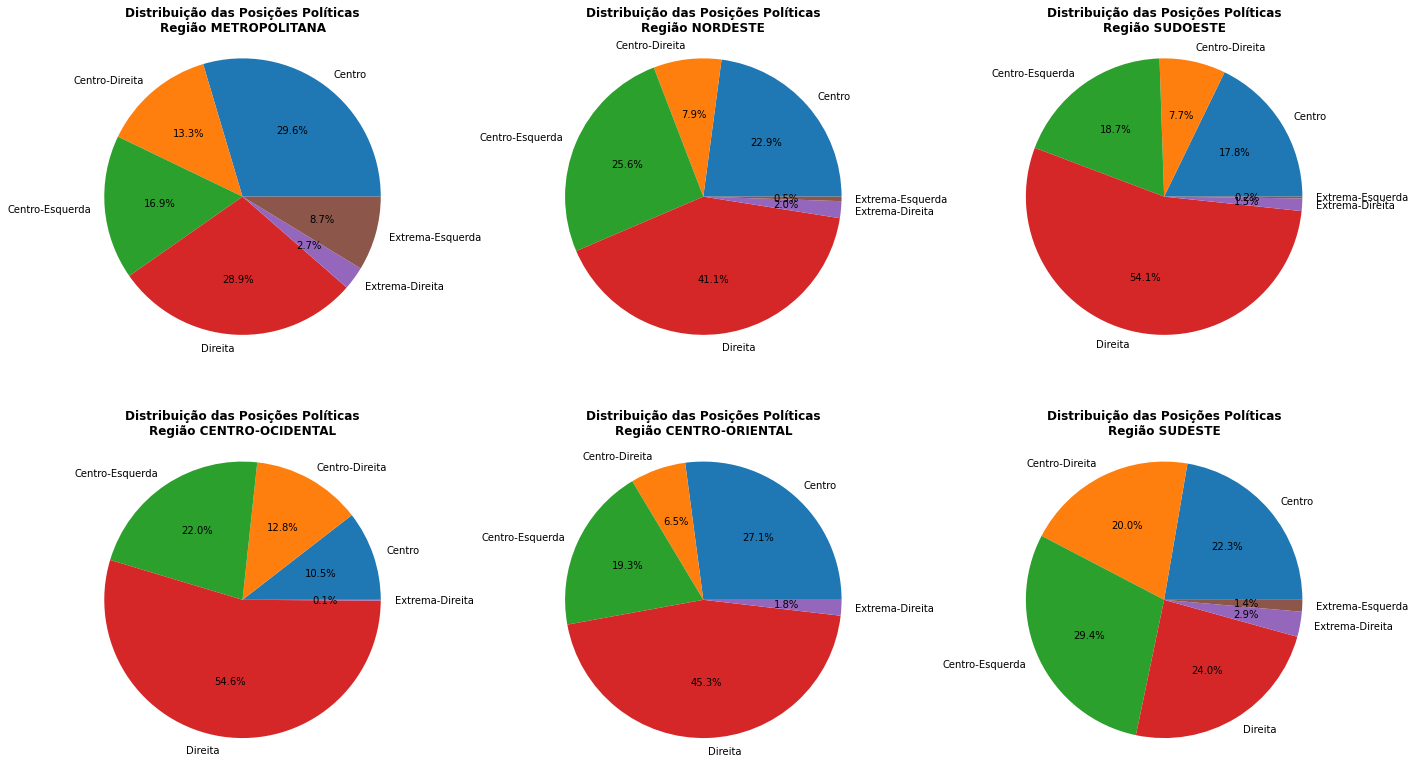

In [12]:
#
#######################################################################
# Criando o DataFrame 
#######################################################################
#
GraficoPorRegiao = PorRegiao.reset_index(level=[0,1])
fig = plt.figure(figsize =(8,8))

#
#######################################################################
# Apresenta o Grafico de Resultados
#######################################################################
#
GraficoAux = GraficoPorRegiao[GraficoPorRegiao['REGIAO'] == "CENTRO-OCIDENTAL"]
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(GraficoAux["QT_VOTOS"], labels=GraficoAux["Posicao"], radius = 1.2, autopct='%1.1f%%')
ax1.set_title('Distribuição das Posições Políticas\nRegião CENTRO-OCIDENTAL\n', fontsize=12, fontweight='bold')

GraficoAux = GraficoPorRegiao[GraficoPorRegiao['REGIAO'] == "CENTRO-ORIENTAL"]
ax2 = fig.add_axes([.8, .0, .5, .5], aspect=1)
ax2.pie(GraficoAux["QT_VOTOS"], labels=GraficoAux["Posicao"], radius = 1.2, autopct='%1.1f%%')
ax2.set_title('Distribuição das Posições Políticas\nRegião CENTRO-ORIENTAL\n', fontsize=12, fontweight='bold')

GraficoAux = GraficoPorRegiao[GraficoPorRegiao['REGIAO'] == "METROPOLITANA"]
ax3 = fig.add_axes([0, .7, .5, .5], aspect=1)
ax3.pie(GraficoAux["QT_VOTOS"], labels=GraficoAux["Posicao"], radius = 1.2, autopct='%1.1f%%')
ax3.set_title('Distribuição das Posições Políticas\nRegião METROPOLITANA\n', fontsize=12, fontweight='bold')

GraficoAux = GraficoPorRegiao[GraficoPorRegiao['REGIAO'] == "NORDESTE"]
ax4 = fig.add_axes([.8, .7, .5, .5], aspect=1)
ax4.pie(GraficoAux["QT_VOTOS"], labels=GraficoAux["Posicao"], radius = 1.2, autopct='%1.1f%%')
ax4.set_title('Distribuição das Posições Políticas\nRegião NORDESTE\n', fontsize=12, fontweight='bold')

GraficoAux = GraficoPorRegiao[GraficoPorRegiao['REGIAO'] == "SUDESTE"]
ax5 = fig.add_axes([1.6, 0, .5, .5], aspect=1)
ax5.pie(GraficoAux["QT_VOTOS"], labels=GraficoAux["Posicao"], radius = 1.2, autopct='%1.1f%%')
ax5.set_title('Distribuição das Posições Políticas\nRegião SUDESTE\n', fontsize=12, fontweight='bold')

GraficoAux = GraficoPorRegiao[GraficoPorRegiao['REGIAO'] == "SUDOESTE"]
ax6 = fig.add_axes([1.6, .7, .5, .5], aspect=1)
ax6.pie(GraficoAux["QT_VOTOS"], labels=GraficoAux["Posicao"], radius = 1.2, autopct='%1.1f%%')
ax6.set_title('Distribuição das Posições Políticas\nRegião SUDOESTE\n', fontsize=12, fontweight='bold')
plt.show()